In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'stix'  # or other, 'dejavuserif'
plt.rcParams['font.family'] = 'serif'  # or 'DejaVu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']  # 'DejaVu Serif' serif' 'Times'

In [2]:
# Define labels for the metrics to be plotted
metric_labels = {
            "precision": "Precision",
            "recall": "Recall",
            "f1_score": "F1-Score",
            "auc": "AUC"
        }
metric_used = "F1-Score"

## 0. Baseline model

In [3]:
# Get the best baseline model
baseline_model = pd.read_csv("../experiments/perf_summary/baseline_val_results.csv").query(f'tuned_by == "{metric_used}"')["version"].astype(str).tolist()
baseline_test_perf = pd.read_csv("../results/metrics/baseline.csv")
baseline_test_perf["version"] = baseline_test_perf["version"].astype(str)
baseline_best = baseline_test_perf[baseline_test_perf["version"].isin(baseline_model)]
baseline_best

,accuracy,precision,recall,f1_score,auc,version,timestamp
8,0.794012,0.495324,0.567024,0.528754,0.799951,202504180259,2025-04-18 17:52:06


## 1. Trade-off of DP-SGD Models

In [4]:
# Read the test performance of the DP-SGD models
dpsgd_models = pd.read_csv("../experiments/perf_summary/dpsgd_val_results.csv").query(f'tuned_by == "{metric_used}"')["version"].astype(str).tolist()
dpsgd_test_perf = pd.read_csv("../results/metrics/dpsgd.csv")
dpsgd_test_perf["version"] = dpsgd_test_perf["version"].astype(str)
dpsgd_best = dpsgd_test_perf[dpsgd_test_perf["version"].isin(dpsgd_models)].sort_values(by="eps", ascending=True)
dpsgd_best

,accuracy,precision,recall,f1_score,auc,version,eps,delta,timestamp
13,0.742690,0.386271,0.445824,0.413917,0.642815,202504201317,0.5,0.00001,2025-04-20 17:34:50
2,0.781356,0.469181,0.554176,0.508148,0.748893,202504192100,1.0,0.00001,2025-04-19 22:29:40
5,0.783451,0.473102,0.549893,0.508616,0.753267,202504200040,3.0,0.00001,2025-04-20 02:47:17
9,0.784237,0.475118,0.560171,0.514151,0.749122,202504201008,5.0,0.00001,2025-04-20 10:42:46


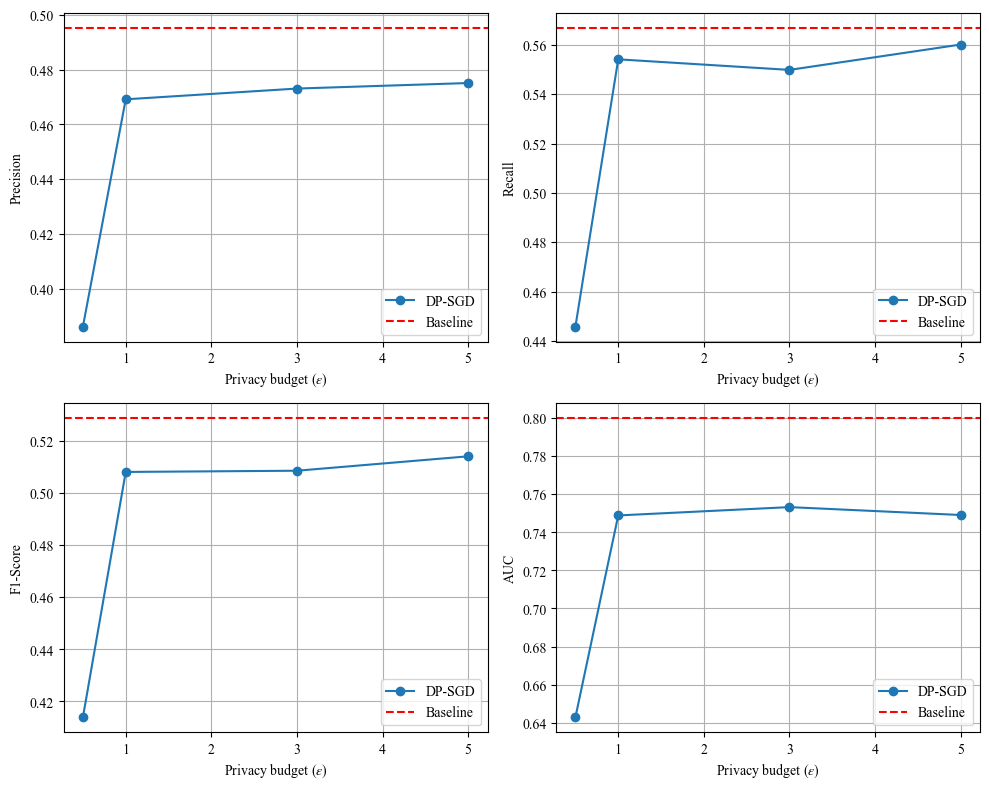

In [5]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, metric in enumerate(metric_labels.keys()):
    ax = axes[i]
    ax.plot(dpsgd_best['eps'], dpsgd_best[metric], marker='o', label='DP-SGD')
    ax.axhline(y=baseline_best[metric].tolist()[0], color='red', linestyle='--', label='Baseline')
    ax.set_ylabel(metric_labels[metric])
    ax.legend(loc='best')
    ax.grid(True)
    ax.set_xlabel(r'Privacy budget ($\varepsilon$)')

plt.tight_layout()
plt.show()